In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Step 2: Load and preprocess the data
data = pd.read_csv('advertising.csv')  # Replace 'advertising.csv' with your dataset file
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#Check if dataset has null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
#Check shape
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']  # Dependent variable

In [7]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)
y_pred
y_pred_list = y_pred.tolist()
y_pred_list[0]

17.034772398435123

In [10]:
# Calculate predictions using your trained model
sales_predictions = model.predict(X)

# Calculate accuracy metrics
mae = mean_absolute_error(y, sales_predictions)
mse = mean_squared_error(y, sales_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, sales_predictions)

# Print the accuracy metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error: 1.24
Mean Squared Error: 2.72
Root Mean Squared Error: 1.65
R-squared (R2) Score: 0.90


In [11]:
# Predict sales column
sales_predictions = model.predict(X)
data['Sales_Predictions'] = sales_predictions
data.head(10)

,TV,Radio,Newspaper,Sales,Sales_Predictions
0,230.1,37.8,69.2,22.1,21.372540
1,44.5,39.3,45.1,10.4,11.302524
2,17.2,45.9,69.3,12.0,10.585608
3,151.5,41.3,58.5,16.5,17.395018
4,180.8,10.8,58.4,17.9,15.912873
5,8.7,48.9,75.0,7.2,10.449834
6,57.5,32.8,23.5,11.8,11.261329
7,120.2,19.6,11.6,13.2,13.294975
8,8.6,2.1,1.0,4.8,5.399228
9,199.8,2.6,21.2,15.6,15.959474


In [12]:
# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error: 1.27
Mean Squared Error: 2.91
Root Mean Squared Error: 1.71
R-squared (R2) Score: 0.91


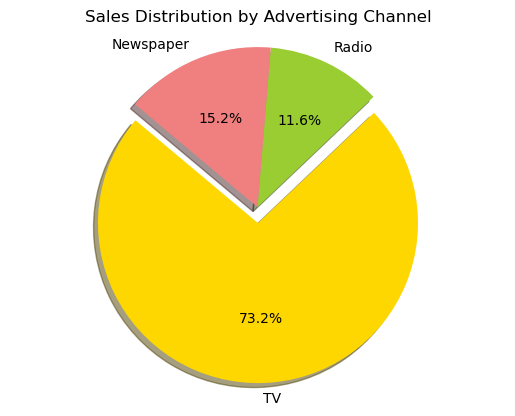

In [13]:
# Pie chart
labels = 'TV', 'Radio', 'Newspaper'
sizes = [data['TV'].sum(), data['Radio'].sum(), data['Newspaper'].sum()]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 1st slice (TV)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sales Distribution by Advertising Channel')
plt.show()

In [14]:
import statsmodels.api as sm
lr = sm.OLS(y_train, X_train).fit()
lr.params

TV           0.067769
Radio        0.147772
Newspaper    0.037716
dtype: float64

In [15]:
#Check Summary
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2327.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                   7.48e-130
Time:                        23:11:13   Log-Likelihood:                         -367.10
No. Observations:                 160   AIC:                                      740.2
Df Residuals:                     157   BIC:                                      749.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
import joblib

# Assuming you have a linear regression model named linear_regression_model
model_filename = 'Sales predication.pkl'

# Save the model to a file
joblib.dump(LinearRegression, model_filename)


['Sales predication.pkl']